In [11]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [12]:
count = 0
for root, folders, filenames in os.walk('/kaggle/input'):
   print(root, folders)

/kaggle/input ['efficientnetv2b2_best_model', 'detection-test-v2']
/kaggle/input/efficientnetv2b2_best_model ['keras']
/kaggle/input/efficientnetv2b2_best_model/keras ['default']
/kaggle/input/efficientnetv2b2_best_model/keras/default ['1']
/kaggle/input/efficientnetv2b2_best_model/keras/default/1 []
/kaggle/input/detection-test-v2 ['TEST DEPLOY V2']
/kaggle/input/detection-test-v2/TEST DEPLOY V2 ['Asli', 'Palsu']
/kaggle/input/detection-test-v2/TEST DEPLOY V2/Asli []
/kaggle/input/detection-test-v2/TEST DEPLOY V2/Palsu []


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


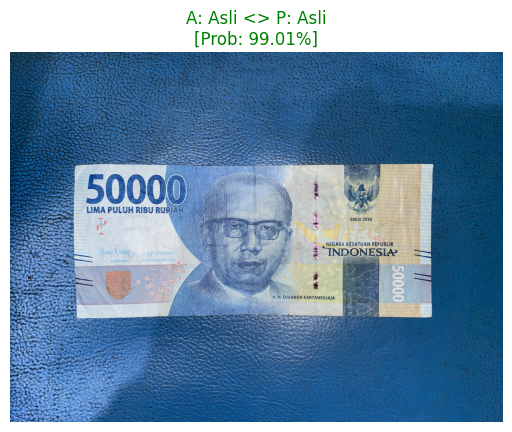

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


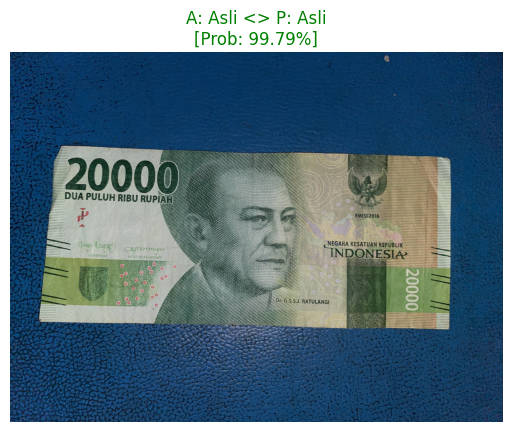

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


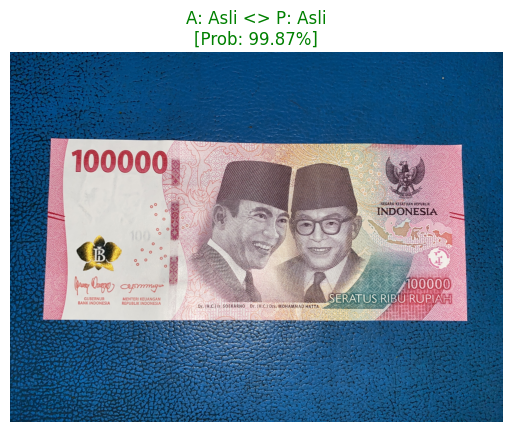

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


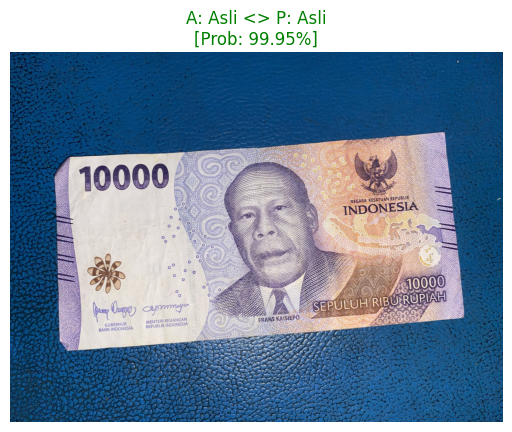

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


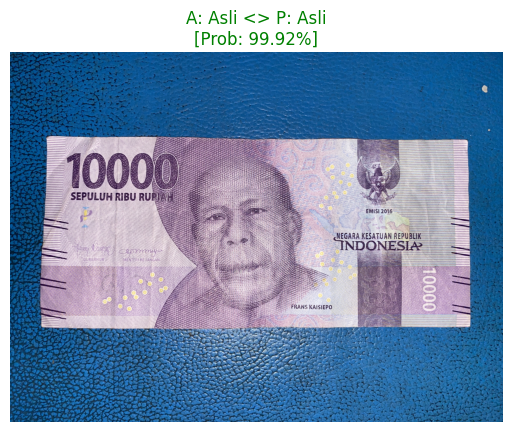

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


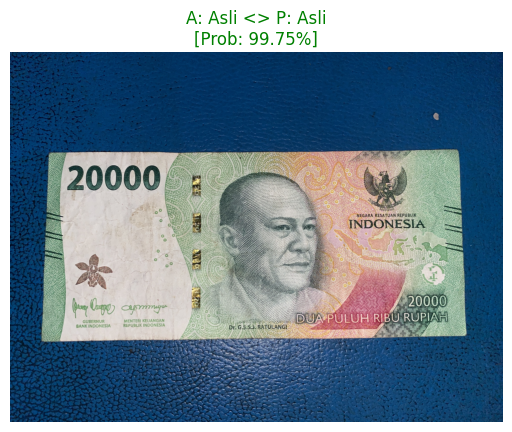

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


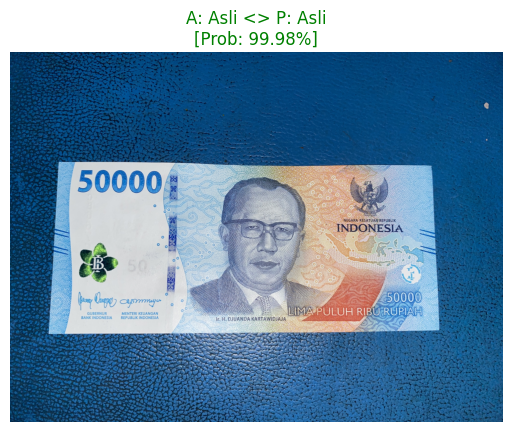

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


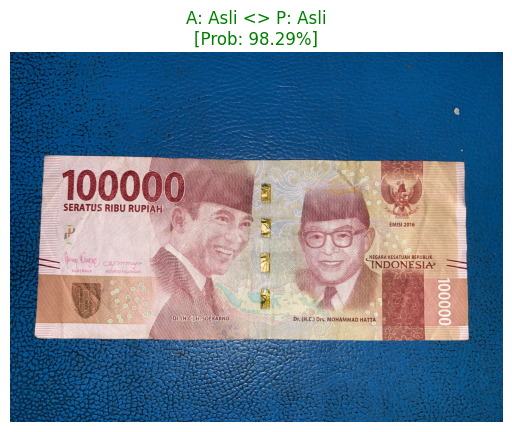

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


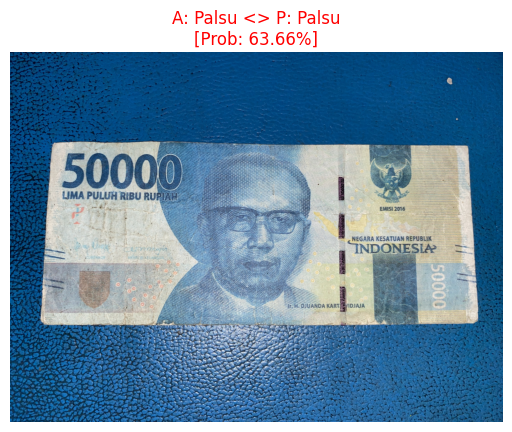

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


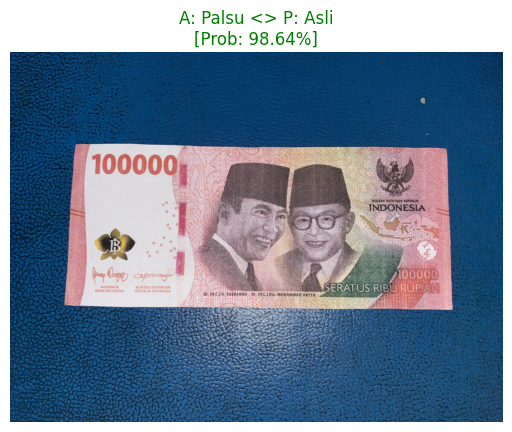

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


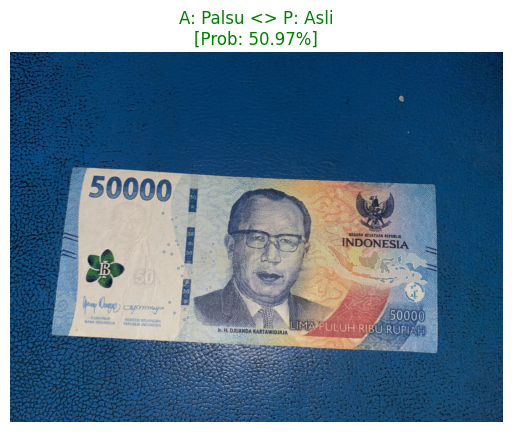

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


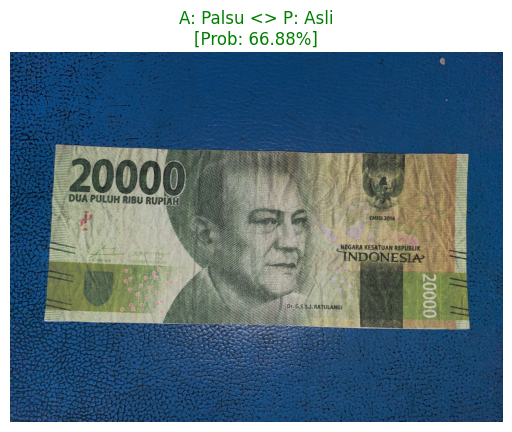

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


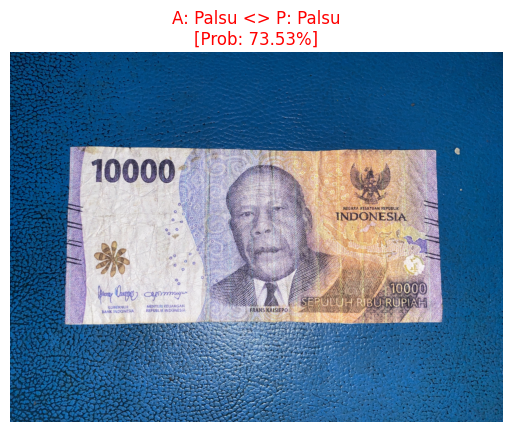

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


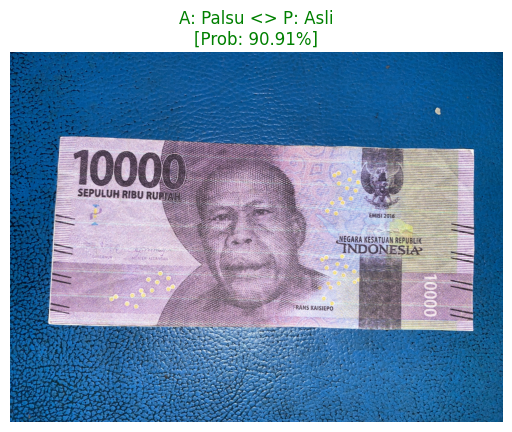

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


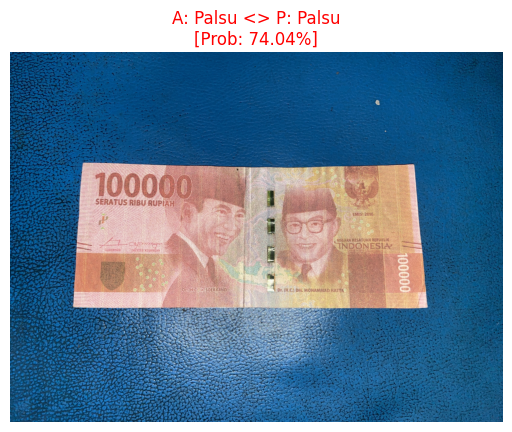

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


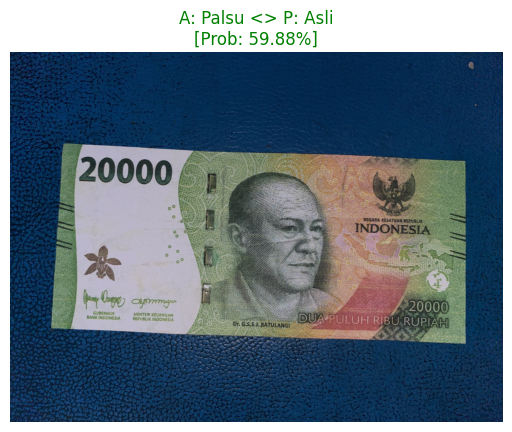

In [15]:
# Load the trained model
model = tf.keras.models.load_model('/kaggle/input/efficientnetv2b2_best_model/keras/default/1/efficientnetv2b2_best_model.keras')

# Define the path to the images
image_directory = '/kaggle/input/detection-test-v2/TEST DEPLOY V2'

# Classes labels
class_labels = {0: 'Asli', 1: 'Palsu'}

# Function to make prediction and display the image
def predict_and_display(img_path, true_label):
    img = image.load_img(img_path, target_size=(448, 448))  # Adjust target size as per your model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Scale pixel values

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    probability = np.max(prediction)

    # Determine the color based on predicted class
    color = 'green' if predicted_class == 0 else 'red'
    
    # Plot the image and prediction
    img_title = f"A: {class_labels[true_label]} <> P: {class_labels[predicted_class]}\n[Prob: {probability*100:.2f}%]"
    plt.imshow(image.load_img(img_path))
    plt.title(img_title, color=color)
    plt.axis('off')
    plt.show()

# Map folder names to true labels
folder_label_map = {'Asli': 0, 'Palsu': 1}

# Iterate through the images in the folders and predict
for folder in ['Asli', 'Palsu']:
    folder_path = os.path.join(image_directory, folder)
    true_label = folder_label_map[folder]
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        predict_and_display(img_path, true_label)
